In [1]:
# ANN model

In [2]:
# %pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [4]:
# reading in data
df = pd.read_csv("merged_with_event_features.csv")
df.dropna(inplace=True)

# need to see head + info on data frame
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7704 entries, 8 to 36493
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   play_id                 7704 non-null   object 
 1   game_id                 7704 non-null   int64  
 2   team_id_for_x           7704 non-null   float64
 3   team_id_against         7704 non-null   float64
 4   event                   7704 non-null   object 
 5   secondaryType           7704 non-null   object 
 6   x                       7704 non-null   float64
 7   y                       7704 non-null   float64
 8   team_id                 7704 non-null   int64  
 9   HoA                     7704 non-null   object 
 10  shots                   7704 non-null   float64
 11  hits                    7704 non-null   float64
 12  pim                     7704 non-null   float64
 13  powerPlayOpportunities  7704 non-null   float64
 14  powerPlayGoals          7704 non-null   floa

In [5]:
# Ensure correct types
df['won'] = df['won'].astype(int)

# Features and target
arrs = df.drop(columns='won')
arrs = arrs.select_dtypes(include=['number']) # need to make sure we're only getting the numeric fields ONLY
target = df['won']

arrs.head()

,game_id,team_id_for_x,team_id_against,x,y,team_id,shots,hits,pim,powerPlayOpportunities,...,takeaways,blocked,team_id_for_y,avg_shot_x,avg_shot_y,num_close_range_shots,num_slap_shot,num_wrist_shot,num_backhand,num_tip-in
8,2016020045,16.0,4.0,-71.0,9.0,4,27.0,30.0,6.0,4.0,...,9.0,11.0,4.0,17.962963,-5.296296,0.0,6.0,36.0,6.0,4.0
9,2016020045,16.0,4.0,-71.0,9.0,16,28.0,20.0,8.0,3.0,...,8.0,9.0,16.0,-10.392857,-2.857143,0.0,14.0,32.0,6.0,0.0
10,2016020045,16.0,4.0,-88.0,5.0,4,27.0,30.0,6.0,4.0,...,9.0,11.0,4.0,17.962963,-5.296296,0.0,6.0,36.0,6.0,4.0
11,2016020045,16.0,4.0,-88.0,5.0,16,28.0,20.0,8.0,3.0,...,8.0,9.0,16.0,-10.392857,-2.857143,0.0,14.0,32.0,6.0,0.0
14,2016020045,4.0,16.0,56.0,-7.0,4,27.0,30.0,6.0,4.0,...,9.0,11.0,4.0,17.962963,-5.296296,0.0,6.0,36.0,6.0,4.0


In [6]:
target = pd.get_dummies(target, prefix='output')
target.head()

,output_0,output_1
8,True,False
9,False,True
10,True,False
11,False,True
14,True,False


In [7]:
# initializing
scaler = StandardScaler()
arrs = pd.DataFrame(scaler.fit_transform(arrs), columns=arrs.columns)

arrs.head()

,game_id,team_id_for_x,team_id_against,x,y,team_id,shots,hits,pim,powerPlayOpportunities,...,takeaways,blocked,team_id_for_y,avg_shot_x,avg_shot_y,num_close_range_shots,num_slap_shot,num_wrist_shot,num_backhand,num_tip-in
0,-1.698795,-0.245237,-1.057745,-1.105866,0.452601,-1.064198,-0.548689,1.026804,-0.336213,0.565018,...,0.419795,-0.794872,-1.064198,0.786250,-1.160916,-0.930539,-0.677395,0.411791,0.105982,0.229165
1,-1.698795,-0.245237,-1.057745,-1.105866,0.452601,-0.253661,-0.419783,-0.298371,-0.187965,-0.075397,...,0.142285,-1.204936,-0.253661,-0.433292,-0.600618,-0.930539,0.902220,0.163489,0.105982,-1.090826
2,-1.698795,-0.245237,-1.057745,-1.370678,0.254187,-1.064198,-0.548689,1.026804,-0.336213,0.565018,...,0.419795,-0.794872,-1.064198,0.786250,-1.160916,-0.930539,-0.677395,0.411791,0.105982,0.229165
3,-1.698795,-0.245237,-1.057745,-1.370678,0.254187,-0.253661,-0.419783,-0.298371,-0.187965,-0.075397,...,0.142285,-1.204936,-0.253661,-0.433292,-0.600618,-0.930539,0.902220,0.163489,0.105982,-1.090826
4,-1.698795,-1.071464,-0.261905,0.872435,-0.341058,-1.064198,-0.548689,1.026804,-0.336213,0.565018,...,0.419795,-0.794872,-1.064198,0.786250,-1.160916,-0.930539,-0.677395,0.411791,0.105982,0.229165


In [8]:
# using 30% test 70% training data
X_train, X_test, y_train, y_test = train_test_split(arrs, target, test_size=0.3, random_state=6, shuffle=True)
print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

X_train.head()
y_train.head()
X_train.head()
y_test.head()

Train set: (5392, 23), (5392, 2)
Test set: (2312, 23), (2312, 2)


,output_0,output_1
13411,True,False
3419,True,False
25359,True,False
24043,True,False
18913,True,False


In [9]:
# initializing
model = MLPClassifier(hidden_layer_sizes=(20,), max_iter=10000)

# fitting training data + predicting 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

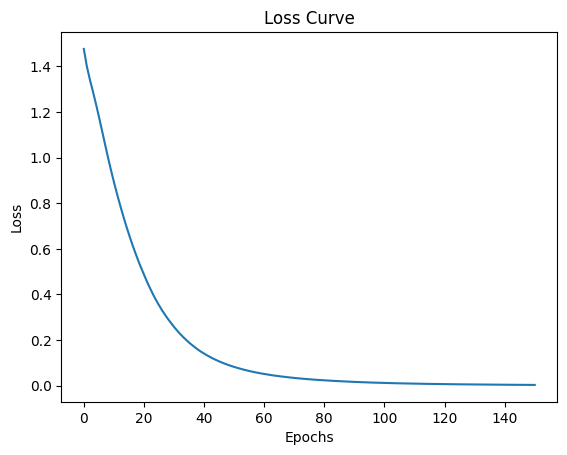

In [10]:
# plot
sns.lineplot(x=range(len(model.loss_curve_)), y=model.loss_curve_)

plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [11]:
print(f"Accuracy Score for y_test -- y_pred:")
print("-------------------")
print(accuracy_score(y_test, y_pred))

Accuracy Score for y_test -- y_pred:
-------------------
1.0


In [ ]:
# the final output
# one-hot to original labels, doing same for predictions
output_df = pd.DataFrame({
    'Actual': y_test.idxmax(axis=1),
    'Predicted': y_pred.argmax(axis=1)
})

# + probabilities -> 1 malignant, 0 benign
if hasattr(model, "predict_proba"):
    prob = model.predict_proba(X_test)
    output_df['Prob_Won'] = prob[:, 1]
    output_df['Prob_Lost'] = prob[:, 0]

In [13]:
# head
output_df.head()

,Actual,Predicted,Prob_Malignant,Prob_Benign
13411,output_0,0,0.000876,0.999887
3419,output_0,0,0.003542,0.997450
25359,output_0,0,0.003795,0.997011
24043,output_0,0,0.007763,0.993639
18913,output_0,0,0.001560,0.998338


In [14]:
# output
output_df.to_csv('output.csv', index=False)
print("Outputted to output.csv")

Outputted to output.csv
